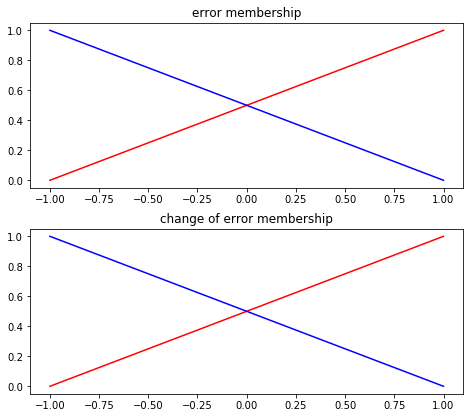

In [1]:
import numpy as np 
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 

# universe of discourse
universe=np.arange(-1,1.01,0.01)
output_universe=np.arange(-10,10,0.01)

# inputs
e1=ctrl.Antecedent(universe,'e1')
e2=ctrl.Antecedent(universe,'e2')



# membership functions

#je l'ai créé de cette manière pour avoir une forme d'une function s et z , mais sans interpolation , juste en modifiant la forme trapezoidale.
# 3 et -3 sont aleatoire, on vas jamais depasser le -1 et 1 de toute façon

positive=fuzzy._membership.trapmf(universe,[-1,1,3,3])
negative=fuzzy._membership.trapmf(universe,[-3,-3,-1,1])


#plots

fig,plot=plt.subplots(2,figsize=(7,6))
fig.tight_layout(pad=2)
plot[0].set_title("error membership")
plot[0].plot(universe,positive,'r',universe,negative,'b')
plot[1].set_title("change of error membership")
plot[1].plot(universe,positive,'r',universe,negative,'b')


def compute_firing_strength(e1,e2,A1i,A2i):
    # calculate the degree of membership 
    mu_A1i=fuzzy.interp_membership(universe,A1i,e1)
    mu_A2i=fuzzy.interp_membership(universe,A2i,e2)

    return mu_A1i*mu_A2i


#Compute using weighted average method
def compute_output(e11, e22, gamma1=1, gamma2=1, gamma3=1, gamma4=1, a1=9, a2=-0.02):
    A1 = [positive, positive, negative, negative]
    A2 = [positive, negative, positive, negative]

    gamma1_val = compute_firing_strength(e11, e22, A1[0], A2[0]) * gamma1
    gamma2_val = compute_firing_strength(e11, e22, A1[1], A2[1]) * gamma2
    gamma3_val = compute_firing_strength(e11, e22, A1[2], A2[2]) * gamma3
    gamma4_val = compute_firing_strength(e11, e22, A1[3], A2[3]) * gamma4

    numerator = (gamma1_val + gamma4_val) * (a1 * e11 + a2 * e22)
    denominator = gamma1_val + gamma2_val + gamma3_val + gamma4_val
   
    phi=numerator / denominator
   
    return phi









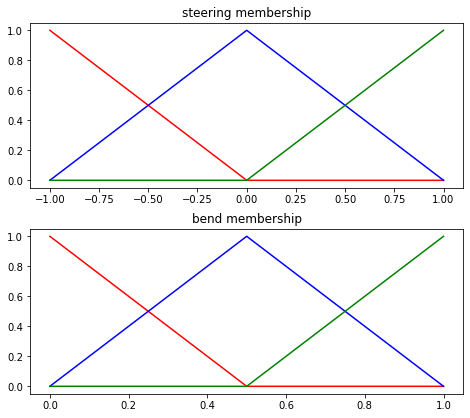

In [4]:
import skfuzzy as fuzzy
from skfuzzy import control as ctrl 
import numpy as np 
from matplotlib import pyplot as plt 



#universe

steering_univ=np.arange(-1,1.01,0.01)
bend_univ=np.arange(0,1.01,0.01)
vsf_univ=np.arange(0.2,1.01,0.01)

#inputs

steering=ctrl.Antecedent(steering_univ,'steering')
bend=ctrl.Antecedent(bend_univ,'steering')

#outputs



#membership functions
#steering 

Gentle=fuzzy._membership.trapmf(steering_univ,[-3,-3,-1,0])
Appropriate=fuzzy._membership.trimf(steering_univ,[-1,0,1])
Aggressive=fuzzy._membership.trapmf(steering_univ,[0,1,3,3])


#bend 

Wide=fuzzy._membership.trapmf(bend_univ,[-3,-3,0,0.5])
Medium=fuzzy._membership.trimf(bend_univ,[0,0.5,1])
Narrow=fuzzy._membership.trapmf(bend_univ,[0.5,1,3,3])

#plots

fig,plot=plt.subplots(2,figsize=(7,6))
fig.tight_layout(pad=2)
plot[0].set_title("steering membership")
plot[0].plot(steering_univ,Gentle,'r',steering_univ,Appropriate,'b',steering_univ,Aggressive,'g')
plot[1].set_title("bend membership")
plot[1].plot(bend_univ,Wide,'r',bend_univ,Medium,'b',bend_univ,Narrow,'g')



def compute_firing_strength(steering,bend,A1i,A2i):
    # calculate the degree of membership 
    mu_A1i=fuzzy.interp_membership(steering_univ,A1i,steering)
    mu_A2i=fuzzy.interp_membership(bend_univ,A2i,bend)

    return mu_A1i*mu_A2i


def compute_output1(steering,bend,low=0.2, medium=0.5, high=1):
    A1 = [Gentle, Appropriate,Aggressive]
    A2 = [Wide, Medium, Narrow]
    fs=[]
    i=0 
    j=0
    for i in range(3) :
        for j in range(3):
            fs_ij= compute_firing_strength(steering, bend, A1[i], A2[j])
            fs.append(fs_ij)
   

    numerator=(fs[0]*high)+(fs[1]*high)+(fs[2]*medium)+(fs[3]*high)+(fs[4]*medium)+(fs[5]*low)+(fs[6]*medium)+(fs[7]*low)+(fs[8]*low)
    denominator=sum(fs)
    vsf=numerator/denominator
    

    return vsf
    
    # fs2 = compute_firing_strength(steering, bend, A1[0], A2[1])
    # fs3 = compute_firing_strength(steering, bend, A1[0], A2[2])
    # fs1 = compute_firing_strength(steering, bend, A1[0], A2[0]) * high
    # gamma2_val = compute_firing_strength(steering, bend, A1[0], A2[1]) * high
    # gamma3_val = compute_firing_strength(steering, bend, A1[0], A2[2]) * medium

    # gamma4_val = compute_firing_strength(steering, bend, A1[1], A2[0]) * high
    # gamma5_val = compute_firing_strength(steering, bend, A1[1], A2[1]) * medium
    # gamma6_val = compute_firing_strength(steering, bend, A1[1], A2[2]) * low
    
    
    # gamma7_val = compute_firing_strength(steering, bend, A1[2], A2[0]) * medium
    # gamma8_val = compute_firing_strength(steering, bend, A1[2], A2[1]) * low
    # gamma9_val = compute_firing_strength(steering, bend, A1[2], A2[2]) * low

    # numerator = 
    # denominator = gamma1_val + gamma2_val + gamma3_val + gamma4_val
   
    # phi=numerator / denominator
   
    # return phi

# rule1 = ctrl.Rule(antecedent=((steering['Aggressive']& bend['Narrow'])), consequent=low, label='rule Aggressive and Narrow')
# rule2 = ctrl.Rule(antecedent=((steering['Aggressive']& bend['Medium'])), consequent=low, label='rule Aggressive and Medium')
# rule3 = ctrl.Rule(antecedent=((steering['Aggressive'] & bend['Wide'])), consequent=medium, label='rule Aggressive and Wide')
# rule4 = ctrl.Rule(antecedent=((steering['Appropriate'] & bend['Narrow'])), consequent=low, label='rule Appropriate and Narrow')
# rule5 = ctrl.Rule(antecedent=((steering['Appropriate'] & bend['Medium'])), consequent=medium, label='rule Appropriate and Medium')
# rule6 = ctrl.Rule(antecedent=((steering['Appropriate'] & bend['Wide'])), consequent=high, label='rule Appropriate and Wide')
# rule7 = ctrl.Rule(antecedent=((steering['Gentle'] & bend['Narrow'])), consequent=medium, label='rule Gentle and Narrow')
# rule8 = ctrl.Rule(antecedent=((steering['Gentle'] & bend['Medium'])), consequent=high, label='rule Gentle and Medium')
# rule9 = ctrl.Rule(antecedent=((steering['Gentle'] & bend['Wide'])), consequent=high, label='rule Gentle and Wide')

#crisp output

In [7]:
compute_output1(0.5840000000000003, 0.7)


0.2748799999999999